# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

578

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=498d2ca43d42d2d12a59be4be9d74a54&units=metric&q=


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York","Vaitupu" ,"Seattle", "Dallas", "Taipei"]
# set up lists to hold reponse info
lat = []
lon = []
mtem = []
hum = []
clo = []
win = []
cou = []
dat = []
cit=[]
i=1
print("Beginning data Retrieval")
# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        mtem.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        clo.append(response['clouds']['all'])
        win.append(response['wind']['speed'])
        cou.append(response['sys']['country'])
        dat.append(datetime.utcfromtimestamp(response['dt']).strftime('%Y-%m-%d %H:%M:%S'))
        cit.append(response['name'])
        print("Processing Record", i ," ", city)
        i=i+1
    except KeyError:
        print("City not found. Skipping", i,city)

Beginning data Retrieval
Processing Record 1   vaini
Processing Record 2   chunhuhub
Processing Record 3   punta arenas
Processing Record 4   george
Processing Record 5   torres
Processing Record 6   puerto ayora
Processing Record 7   ushuaia
Processing Record 8   jamestown
Processing Record 9   rikitea
Processing Record 10   bose
Processing Record 11   cape town
Processing Record 12   chuy
Processing Record 13   busselton
Processing Record 14   nanortalik
Processing Record 15   bethel
Processing Record 16   kichera
Processing Record 17   mataura
Processing Record 18   butaritari
Processing Record 19   avarua
Processing Record 20   hobart
Processing Record 21   castro
Processing Record 22   kagadi
Processing Record 23   woodward
Processing Record 24   hithadhoo
Processing Record 25   lagoa
Processing Record 26   karaidel
Processing Record 27   necochea
Processing Record 28   laguna
Processing Record 29   havre-saint-pierre
City not found. Skipping 30 sataua
Processing Record 30   darha

Processing Record 222   baiyin
Processing Record 223   san marcos
Processing Record 224   quatre cocos
Processing Record 225   barguzin
Processing Record 226   namibe
Processing Record 227   altona
Processing Record 228   balabac
Processing Record 229   turbat
City not found. Skipping 230 tsihombe
Processing Record 230   okhotsk
Processing Record 231   honningsvag
Processing Record 232   ostrovnoy
Processing Record 233   oystese
Processing Record 234   diamantino
Processing Record 235   bam
Processing Record 236   chauk
Processing Record 237   alakurtti
City not found. Skipping 238 belushya guba
City not found. Skipping 238 stamsund
Processing Record 238   deming
Processing Record 239   fortuna
Processing Record 240   panalingaan
Processing Record 241   the valley
Processing Record 242   port-gentil
Processing Record 243   gushikawa
Processing Record 244   selma
Processing Record 245   carutapera
Processing Record 246   pueblo nuevo
Processing Record 247   fernley
Processing Record 248

Processing Record 455   acarau
Processing Record 456   geilo
Processing Record 457   altamira
Processing Record 458   west milford
Processing Record 459   ati
Processing Record 460   polson
Processing Record 461   zhigansk
Processing Record 462   sinjar
City not found. Skipping 463 vreed en hoop
Processing Record 463   alyangula
Processing Record 464   ocosingo
Processing Record 465   sur
Processing Record 466   salcedo
Processing Record 467   te horo
Processing Record 468   vila velha
Processing Record 469   santa rita
Processing Record 470   te anau
Processing Record 471   morrope
Processing Record 472   vanavara
Processing Record 473   iquitos
Processing Record 474   polunochnoye
Processing Record 475   reconquista
Processing Record 476   grants
Processing Record 477   kieta
Processing Record 478   salamiyah
Processing Record 479   iralaya
Processing Record 480   lerwick
Processing Record 481   beloha
Processing Record 482   ponto novo
Processing Record 483   komsomolskiy
Processing

In [5]:
print(len(cities))

578


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# create a data frame from cities, lat, and temp
cities_dict = {
    "City": cit,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": mtem,
    "Humidity": hum,
    "Cloudiness": clo,
    "Wind Speed": win,
    "Country": cou,
    "Date": dat
}
cities_data = pd.DataFrame(cities_dict)
cities_data.to_csv("Output/cities_weather.csv", index=False)
cities_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,29.00,84,75,5.66,TO,2021-02-07 00:24:06
1,Chunhuhub,19.5500,-88.6833,27.30,68,6,1.55,MX,2021-02-07 00:25:34
2,Punta Arenas,-53.1500,-70.9167,12.00,62,0,8.23,CL,2021-02-07 00:23:18
3,George,-33.9630,22.4617,19.00,94,75,3.60,ZA,2021-02-07 00:25:35
4,Torres,-29.3353,-49.7269,21.10,83,86,1.89,BR,2021-02-07 00:25:35
...,...,...,...,...,...,...,...,...,...
531,Srednekolymsk,67.4500,153.6833,-27.27,83,27,0.24,RU,2021-02-07 00:26:50
532,Kaduy,59.2000,37.1500,-15.89,93,100,4.01,RU,2021-02-07 00:26:51
533,Hokitika,-42.7167,170.9667,19.03,68,8,2.57,NZ,2021-02-07 00:26:51
534,Pingzhuang,42.0372,119.2889,-15.70,88,12,2.06,CN,2021-02-07 00:26:51


In [51]:
#display stadistics summary
cities_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,18.664830,14.472185,10.733060,73.134328,48.063433,3.708377
std,34.048075,91.252207,17.531306,19.223444,39.367709,2.631581
min,-54.800000,-179.166700,-42.000000,9.000000,0.000000,0.160000
25%,-10.639350,-64.648925,0.000000,64.000000,2.750000,1.785000
50%,20.912850,17.915350,17.780000,78.000000,40.000000,3.090000
75%,47.673350,93.791675,25.000000,87.000000,90.000000,5.140000
max,78.218600,179.316700,33.000000,100.000000,100.000000,12.920000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [66]:
clean_city_data=cities_data.loc[cities_data['Humidity']<=100]
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,29.0,84,75,5.66,TO,2021-02-07 00:24:06
1,Chunhuhub,19.5500,-88.6833,27.3,68,6,1.55,MX,2021-02-07 00:25:34
2,Punta Arenas,-53.1500,-70.9167,12.0,62,0,8.23,CL,2021-02-07 00:23:18
3,George,-33.9630,22.4617,19.0,94,75,3.60,ZA,2021-02-07 00:25:35
4,Torres,-29.3353,-49.7269,21.1,83,86,1.89,BR,2021-02-07 00:25:35


In [12]:
#  Get the indices of cities that have humidity over 100%.
#over100=[]
#over100 = next(iter((cities_data['Humidity']>=100).index), 'no match')

In [67]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
col_hum = clean_city_data['Humidity']
outliers = col_hum.between(col_hum.quantile(.05), col_hum.quantile(.95))
hum_to_drop = clean_city_data[~outliers].index
print(str(len(hum_to_drop)) + " data drop of " + str(len(clean_city_data)) + " total cities.") 
clean_city_data=clean_city_data.drop(hum_to_drop)
clean_city_data

53 data drop of 536 total cities.


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,29.00,84,75,5.66,TO,2021-02-07 00:24:06
1,Chunhuhub,19.5500,-88.6833,27.30,68,6,1.55,MX,2021-02-07 00:25:34
2,Punta Arenas,-53.1500,-70.9167,12.00,62,0,8.23,CL,2021-02-07 00:23:18
3,George,-33.9630,22.4617,19.00,94,75,3.60,ZA,2021-02-07 00:25:35
4,Torres,-29.3353,-49.7269,21.10,83,86,1.89,BR,2021-02-07 00:25:35
...,...,...,...,...,...,...,...,...,...
531,Srednekolymsk,67.4500,153.6833,-27.27,83,27,0.24,RU,2021-02-07 00:26:50
532,Kaduy,59.2000,37.1500,-15.89,93,100,4.01,RU,2021-02-07 00:26:51
533,Hokitika,-42.7167,170.9667,19.03,68,8,2.57,NZ,2021-02-07 00:26:51
534,Pingzhuang,42.0372,119.2889,-15.70,88,12,2.06,CN,2021-02-07 00:26:51


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

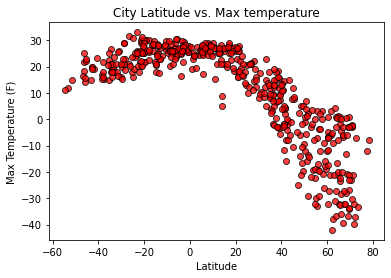

In [68]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("Images/latvsmmaxtemp.png")
plt.show()

## Latitude vs. Humidity Plot

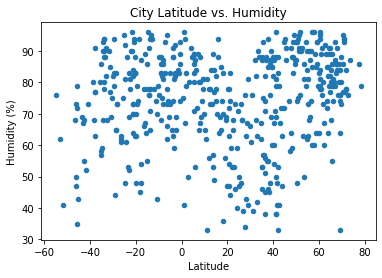

In [69]:
clean_city_data.plot(kind="scatter", x="Lat", y="Humidity", title="City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("Images/latvshum.png")
plt.show()

## Latitude vs. Cloudiness Plot

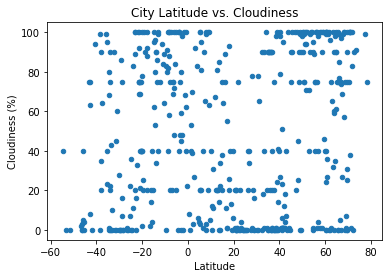

In [70]:
clean_city_data.plot(kind="scatter", x="Lat", y="Cloudiness", title="City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("Images/latvsclou.png")
plt.show()

## Latitude vs. Wind Speed Plot

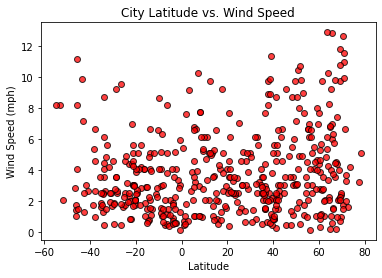

In [71]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig("Images/latvswin.png")
plt.show()

## Linear Regression

In [72]:
northern_hemi_data=clean_city_data.loc[clean_city_data['Lat']>=0]
northern_hemi_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Chunhuhub,19.5500,-88.6833,27.30,68,6,1.55,MX,2021-02-07 00:25:34
7,Jamestown,42.0970,-79.2353,-8.00,53,1,3.09,US,2021-02-07 00:21:07
9,Bose,45.4612,8.0137,7.78,91,100,0.45,IT,2021-02-07 00:25:36
13,Nanortalik,60.1432,-45.2371,-4.72,83,24,4.41,GL,2021-02-07 00:24:26
14,Bethel,41.3712,-73.4140,2.00,38,1,2.06,US,2021-02-07 00:25:36
...,...,...,...,...,...,...,...,...,...
528,Rovinj,45.0800,13.6400,12.00,94,75,3.60,HR,2021-02-07 00:26:50
529,Rincon,32.2960,-81.2354,10.00,87,90,6.17,US,2021-02-07 00:23:27
531,Srednekolymsk,67.4500,153.6833,-27.27,83,27,0.24,RU,2021-02-07 00:26:50
532,Kaduy,59.2000,37.1500,-15.89,93,100,4.01,RU,2021-02-07 00:26:51


In [73]:
southern_hemi_data=clean_city_data.loc[clean_city_data['Lat']<0]
southern_hemi_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,29.00,84,75,5.66,TO,2021-02-07 00:24:06
2,Punta Arenas,-53.1500,-70.9167,12.00,62,0,8.23,CL,2021-02-07 00:23:18
3,George,-33.9630,22.4617,19.00,94,75,3.60,ZA,2021-02-07 00:25:35
4,Torres,-29.3353,-49.7269,21.10,83,86,1.89,BR,2021-02-07 00:25:35
5,Puerto Ayora,-0.7393,-90.3518,25.56,93,62,1.34,EC,2021-02-07 00:25:35
...,...,...,...,...,...,...,...,...,...
520,Letlhakane,-21.4167,25.5833,21.93,82,92,4.26,BW,2021-02-07 00:26:49
525,Opuwo,-18.0607,13.8400,22.32,45,88,1.79,NA,2021-02-07 00:26:49
530,Elliot,-31.3333,27.8500,16.22,85,45,1.97,ZA,2021-02-07 00:26:50
533,Hokitika,-42.7167,170.9667,19.03,68,8,2.57,NZ,2021-02-07 00:26:51


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.735143269388384


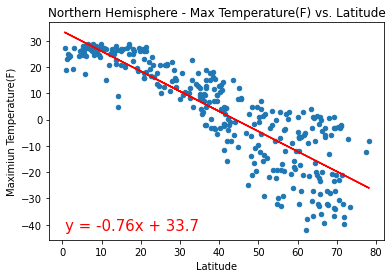

In [74]:
northern_hemi_data.plot(kind="scatter", x="Lat", y="Max Temp", title="Northern Hemisphere - Max Temperature(F) vs. Latitude")
# Add the linear regression equation and line to plot
x_values = northern_hemi_data['Lat']
y_values = northern_hemi_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
#take values to print the line eq
x=x_values.min()
y=y_values.min()
plt.annotate(line_eq,(x,y),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
#save image
plt.savefig("Images/norlatvsmaxtem.png")
plt.ylabel("Maximiun Temperature(F)")
plt.xlabel("Latitude")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3706323269011783


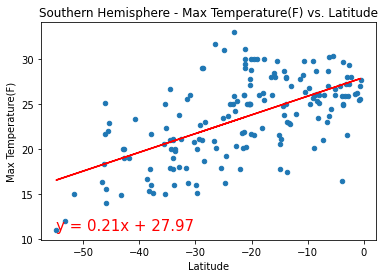

In [75]:
southern_hemi_data.plot(kind="scatter", x="Lat", y="Max Temp", title="Southern Hemisphere - Max Temperature(F) vs. Latitude")
# Add the linear regression equation and line to plot
x_values = southern_hemi_data['Lat']
y_values = southern_hemi_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
x=x_values.min()
y=y_values.min()
plt.annotate(line_eq,(x,y),fontsize=15,color="red")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
#save image
plt.savefig("Images/soulatvsmaxtem.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06508490625895705


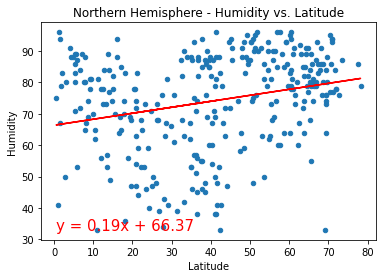

In [76]:
northern_hemi_data.plot(kind="scatter", x="Lat", y="Humidity", title="Northern Hemisphere - Humidity vs. Latitude")
# Add the linear regression equation and line to plot
x_values = northern_hemi_data['Lat']
y_values = northern_hemi_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
#take values to print the line eq
x=x_values.min()
y=y_values.min()
plt.annotate(line_eq,(x,y),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
#save image
plt.savefig("Images/norlatvshum.png")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.16315763043392809


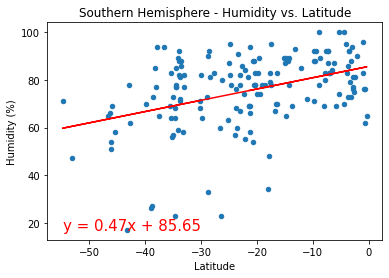

In [58]:
southern_hemi_data.plot(kind="scatter", x="Lat", y="Humidity", title="Southern Hemisphere - Humidity vs. Latitude")
# Add the linear regression equation and line to plot
x_values = southern_hemi_data['Lat']
y_values = southern_hemi_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
x=x_values.min()
y=y_values.min()
plt.annotate(line_eq,(x,y),fontsize=15,color="red")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
#save image
plt.savefig("Images/soulatvshum.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09181739461103675


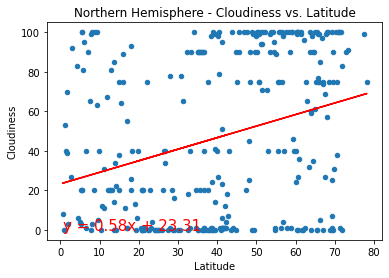

In [77]:
northern_hemi_data.plot(kind="scatter", x="Lat", y="Cloudiness", title="Northern Hemisphere - Cloudiness vs. Latitude")

# Add the linear regression equation and line to plot
x_values = northern_hemi_data['Lat']
y_values = northern_hemi_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
x=x_values.min()
y=y_values.min()
plt.annotate(line_eq,(x,y),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
#save image
plt.savefig("Images/norlatvsclou.png")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1498176670470168


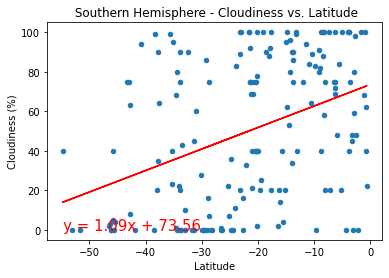

In [78]:
southern_hemi_data.plot(kind="scatter", x="Lat", y="Cloudiness", title=" Southern Hemisphere - Cloudiness vs. Latitude")

# Add the linear regression equation and line to plot
x_values = southern_hemi_data['Lat']
y_values = southern_hemi_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
x=x_values.min()
y=y_values.min()
plt.annotate(line_eq,(x,y),fontsize=15,color="red")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
#save image
plt.savefig("Images/soulatvsclou.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02085688771523151


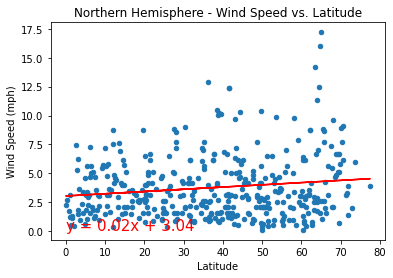

In [61]:
northern_hemi_data.plot(kind="scatter", x="Lat", y="Wind Speed", title="Northern Hemisphere - Wind Speed vs. Latitude")
# Add the linear regression equation and line to plot
x_values = northern_hemi_data['Lat']
y_values = northern_hemi_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
x=x_values.min()
y=y_values.min()
plt.annotate(line_eq,(x,y),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
#save image
plt.savefig("Images/norlatvswin.png")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05904345374744498


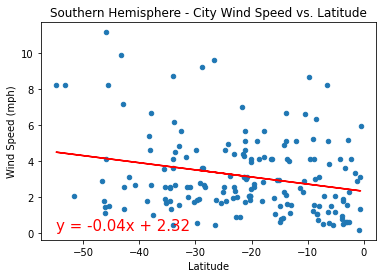

In [79]:
southern_hemi_data.plot(kind="scatter", x="Lat", y="Wind Speed", title="Southern Hemisphere - City Wind Speed vs. Latitude")
# Add the linear regression equation and line to plot
x_values = southern_hemi_data['Lat']
y_values = southern_hemi_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
x=x_values.min()
y=y_values.min()
plt.annotate(line_eq,(x,y),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
#save image
plt.savefig("Images/soulatvswin.png")
plt.show()